#**CREDIT CARD APPROVAL CAPSTONE PROJECT**
#**In this project, we’ll be Utilize machine learning approaches to predict credit card approval based on customer information.**

# * Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
# * We’ll start by loading and viewing the dataset.
# * To manipulate data, if there are any missing entries in the dataset.
# * To perform exploratory data analysis (EDA) on our dataset.
# * To pre-process data before applying machine learning model to the dataset.
# * To apply machine learning model that can predict if an individual’s application for a credit card will be accepted or not.

# Credit Card Applications and the problems associated with it.
Nowadays, banks receive a lot of applications for issuance of credit cards. Many of them rejected for many reasons, like high-loan balances, low-income levels, or too many inquiries on an individual’s credit report. Manually analyzing these applications is error-prone and a time-consuming process.

---

Luckily, this task can be automated with the power of machine learning and pretty much every bank does so nowadays. In this project, we will be build an automatic credit card approval predictor using machine learning techniques

# **Q1.Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?**

###ANSWER:The proposal to predict credit card approval is highly relevant in today's world due to the increasing use of credit cards as a financial tool. With the rise in e-commerce and online transactions, credit cards have become a primary payment method for many individuals, making it essential for banks to efficiently process credit card applications and improve the approval rate. Predicting a good client is essential for a bank because it helps to minimize the risk of credit default and reduce the cost of managing credit card accounts. Banks can use machine learning algorithms to analyze various factors such as income level, employment status etc. By accurately predicting, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability and improved customer satisfaction.###


# **Q2.How is it going to impact the banking sector?**
###ANSWER :Using machine learning for credit card approvals can transform banking. It makes getting a credit card quicker and more accurate, boosting customer satisfaction.

###Predicting default risk: ML helps banks predict if someone might struggle to pay their credit card bills. By identifying low-risk clients, banks can offer better terms, lowering the chance of defaults and boosting profits.###

###Boosting profitability: ML reduces the risk of defaults and speeds up the approval process. This helps banks make more money, allowing them to offer better deals and attract more customers, ultimately leading to increased revenue.###







# **Q3.If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.**
###Answer:In case there's a gap in how Indian banks approve credit cards, our proposed method can be beneficial. It boosts approval accuracy, refines credit risk management, and enhances efficiency. To fully utilize these advantages, banks must ensure access to reliable and comprehensive data.###

# **IMPORTING LIBRARIES AND LOADING DATA**

In [4]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load credit_card data
credit_card = pd.read_csv('/content/Credit_card.csv')  # Replace 'credit_card.csv' with the actual filename

# Load credit_card_label data
credit_card_label = pd.read_csv('/content/Credit_card_label.csv')  # Replace 'credit_card_label.csv' with the actual filename

# Assuming 'id' is the common identifier
df = pd.merge(credit_card, credit_card_label, on='Ind_ID')

# Display the merged data
print(df.head())

    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0        

# **DATA INFORMATION AND DATA TRANSFORMATION**

In [6]:
df.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [7]:
# rename columns
df1 = df.rename(columns={'Ind_ID':'Ind_id', 'GENDER': 'Gender', 'CHILDREN': 'Children', 'EDUCATION': 'Education', 'EMAIL_ID':'Email_id','Birthday_count': 'Age','Employed_days':'Employed_exp'})

In [8]:
df1.head()

Ind_id Gender Car_Owner Propert_Owner  Children  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         Education Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

       Age  Employed_exp  Mobile_phone  Work_Phone  Phone  Email_id  \
0 -18772.0        365243             1           0      0         0   
1 -13557.0          -586             1           1      1         0   
2      NaN          -586             1           1      1         0   
3 -13557.0          -586             1           1      1         0   
4 -13557.0          -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [ ]:
df1.describe()

Ind_id     Children  Annual_income           Age   Employed_exp  \
count  1.548000e+03  1548.000000   1.525000e+03   1526.000000    1548.000000   
mean   5.078920e+06     0.412791   1.913993e+05 -16040.342071   59364.689922   
std    4.171759e+04     0.776691   1.132530e+05   4229.503202  137808.062701   
min    5.008827e+06     0.000000   3.375000e+04 -24946.000000  -14887.000000   
25%    5.045070e+06     0.000000   1.215000e+05 -19553.000000   -3174.500000   
50%    5.078842e+06     0.000000   1.665000e+05 -15661.500000   -1565.000000   
75%    5.115673e+06     1.000000   2.250000e+05 -12417.000000    -431.750000   
max    5.150412e+06    14.000000   1.575000e+06  -7705.000000  365243.000000   

       Mobile_phone   Work_Phone        Phone     Email_id  Family_Members  \
count        1548.0  1548.000000  1548.000000  1548.000000     1548.000000   
mean            1.0     0.208010     0.309432     0.092377        2.161499   
std             0.0     0.406015     0.462409     0.289651        0.947772   
min             1.0     0.000000     0.000000     0.000000        1.000000   
25%             1.0     0.000000     0.000000     0.000000        2.000000   
50%             1.0     0.000000     0.000000     0.000000        2.000000   
75%             1.0     0.000000     1.000000     0.000000        3.000000   
max             1.0     1.000000     1.000000     1.000000       15.000000   

             label  
count  1548.000000  
mean      0.113049  
std       0.316755  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [ ]:
#finding null values.
df1.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income       23
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                 22
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1548 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   Children         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   Education        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Age              1526 non-null   float64
 11  Employed_exp     1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  Email_id         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

<Axes: >

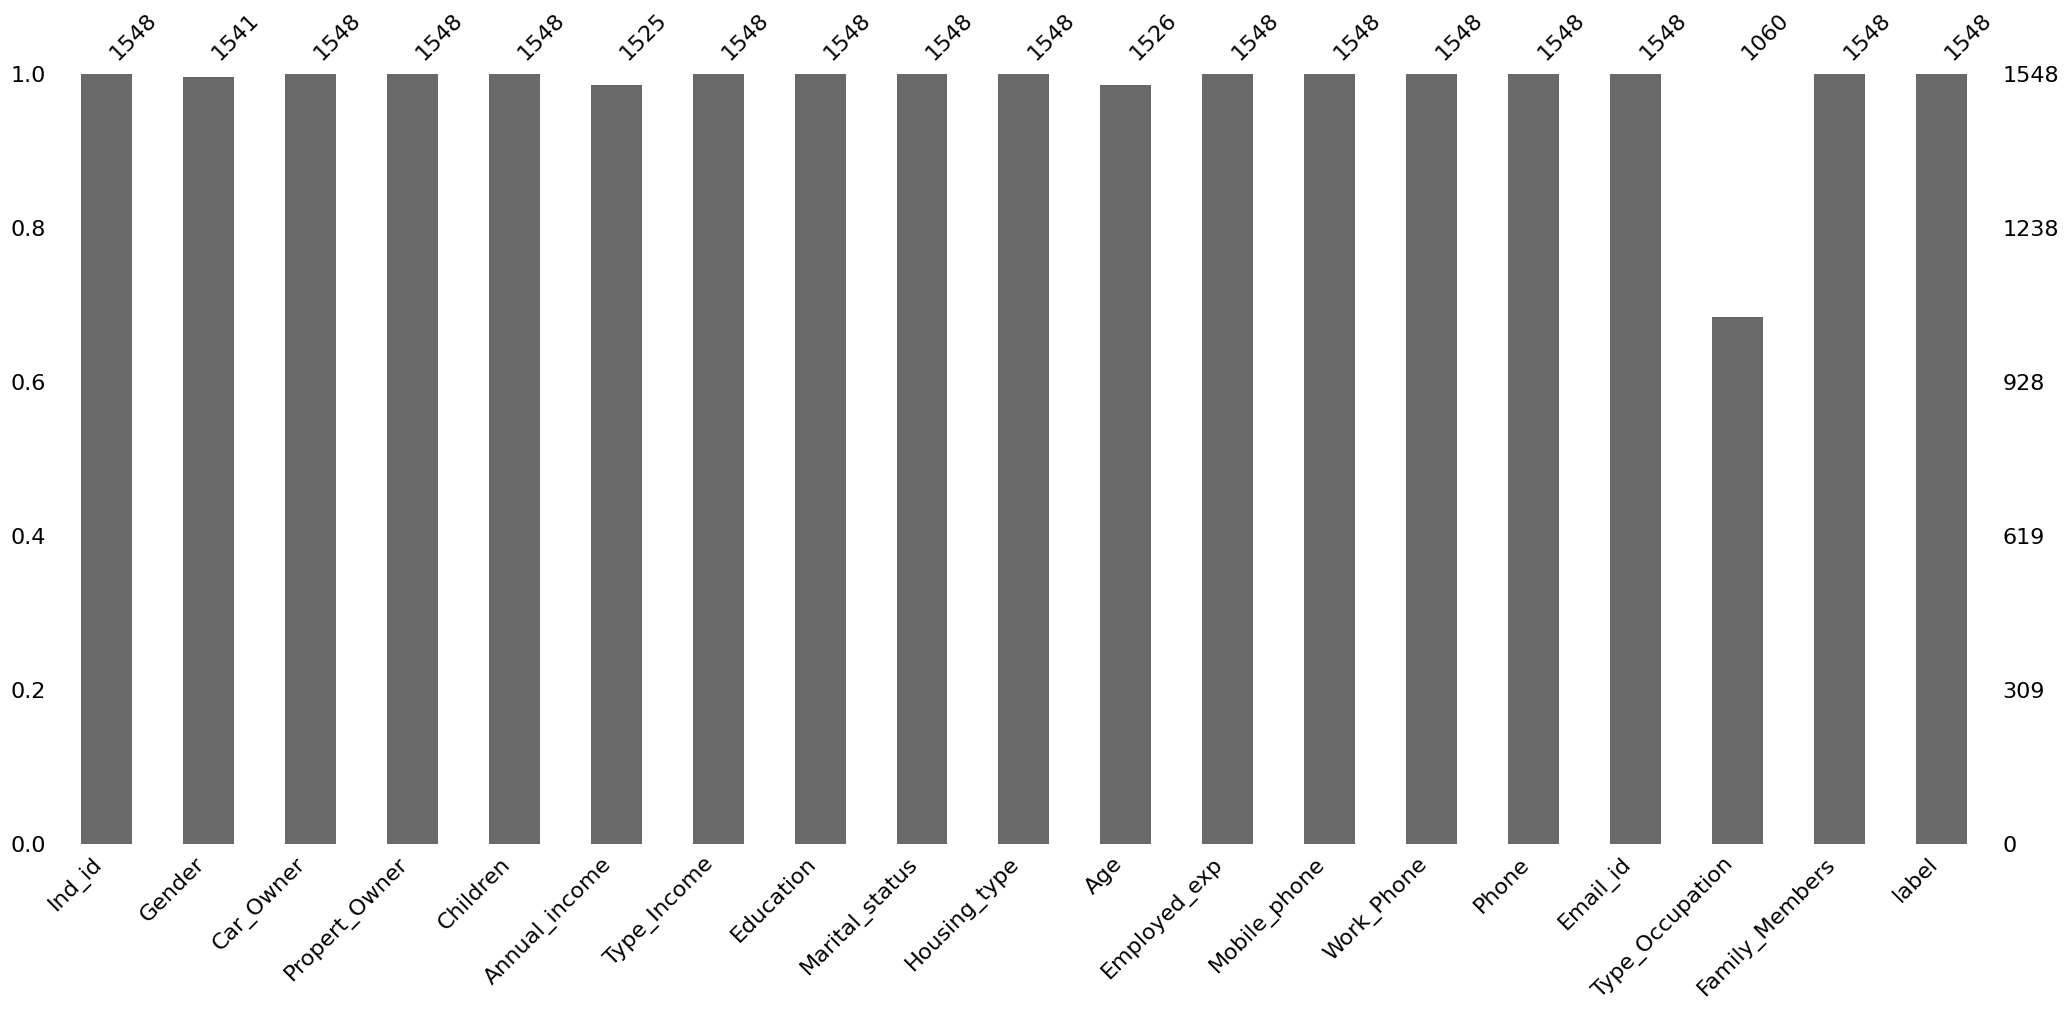

In [ ]:
import missingno as msno
msno.bar(df1)

<Axes: >

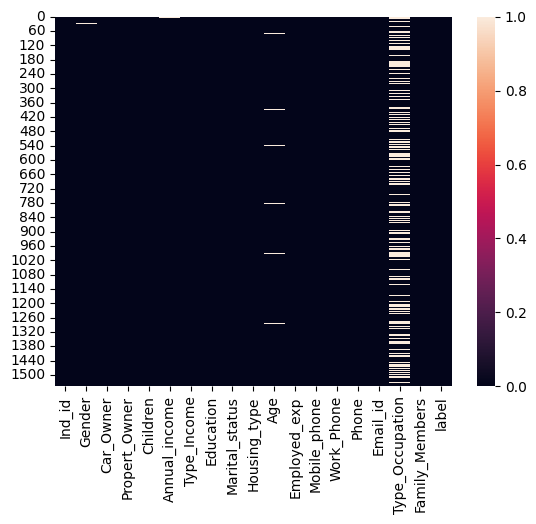

In [ ]:
# visualising the missing values by plotting heatmap
sns.heatmap(df1.isnull())



In [ ]:
# Imputing the null values with mean values
df1.fillna(df1.mean(), inplace=True)

In [ ]:
# finding the null values.
df1.isnull().sum()

Ind_id               0
Gender               7
Car_Owner            0
Propert_Owner        0
Children             0
Annual_income        0
Type_Income          0
Education            0
Marital_status       0
Housing_type         0
Age                  0
Employed_exp         0
Mobile_phone         0
Work_Phone           0
Phone                0
Email_id             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
# replace missing values in ocuupation with 'Other'.
df1['Type_Occupation'].fillna('other',inplace=True)

In [ ]:
# Deleting the null values in the Gender column
df1=df1.dropna(subset=["Gender"])

In [ ]:
df1.head()

Ind_id Gender Car_Owner Propert_Owner  Children  Annual_income  \
0  5008827      M         Y             Y         0   180000.00000   
1  5009744      F         Y             N         0   315000.00000   
2  5009746      F         Y             N         0   315000.00000   
3  5009749      F         Y             N         0   191399.32623   
4  5009752      F         Y             N         0   315000.00000   

            Type_Income         Education Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

            Age  Employed_exp  Mobile_phone  Work_Phone  Phone  Email_id  \
0 -18772.000000        365243             1           0      0         0   
1 -13557.000000          -586             1           1      1         0   
2 -16040.342071          -586             1           1      1         0   
3 -13557.000000          -586             1           1      1         0   
4 -13557.000000          -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0           other               2      1  
1           other               2      1  
2           other               2      1  
3           other               2      1  
4           other               2      1

In [ ]:
# count the rows and columns
df1.shape


(1541, 19)

In [ ]:
df1.columns

Index(['Ind_id', 'Gender', 'Car_Owner', 'Propert_Owner', 'Children',
       'Annual_income', 'Type_Income', 'Education', 'Marital_status',
       'Housing_type', 'Age', 'Employed_exp', 'Mobile_phone', 'Work_Phone',
       'Phone', 'Email_id', 'Type_Occupation', 'Family_Members', 'label'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_id           1541 non-null   int64  
 1   Gender           1541 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   Children         1541 non-null   int64  
 5   Annual_income    1541 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   Education        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Age              1541 non-null   float64
 11  Employed_exp     1541 non-null   int64  
 12  Mobile_phone     1541 non-null   int64  
 13  Work_Phone       1541 non-null   int64  
 14  Phone            1541 non-null   int64  
 15  Email_id         1541 non-null   int64  
 16  Type_Occupation  1541 non-null   object 
 17  Family_Members

In [ ]:
# converting the negative values to actual age
df1['Age']=abs(round((df1['Age']/-365),0))
# converting negative values to exprience of the employee
df1['Employed_exp']=abs(round((df1['Employed_exp']/-365),0))

In [ ]:
# replacing the extreme values with zero.
df1['Employed_exp'].replace(1001.0, 0,inplace=True)


In [ ]:
df1.head()

Ind_id Gender Car_Owner Propert_Owner  Children  Annual_income  \
0  5008827      M         Y             Y         0   180000.00000   
1  5009744      F         Y             N         0   315000.00000   
2  5009746      F         Y             N         0   315000.00000   
3  5009749      F         Y             N         0   191399.32623   
4  5009752      F         Y             N         0   315000.00000   

            Type_Income         Education Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

    Age  Employed_exp  Mobile_phone  Work_Phone  Phone  Email_id  \
0  51.0           0.0             1           0      0         0   
1  37.0           2.0             1           1      1         0   
2  44.0           2.0             1           1      1         0   
3  37.0           2.0             1           1      1         0   
4  37.0           2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0           other               2      1  
1           other               2      1  
2           other               2      1  
3           other               2      1  
4           other               2      1

In [ ]:
# count number of males and females
gender_count=df1['Gender'].value_counts()
gender_count


F    973
M    568
Name: Gender, dtype: int64

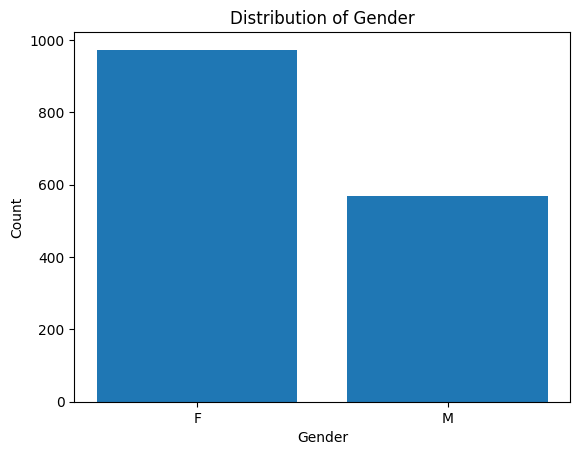

In [ ]:
#creat barpolt using Matplotlib
plt.bar(gender_count.index,gender_count.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()

In [ ]:
# count number of car owner
car_owner_count=df1['Car_Owner'].value_counts()
car_owner_count

N    922
Y    619
Name: Car_Owner, dtype: int64

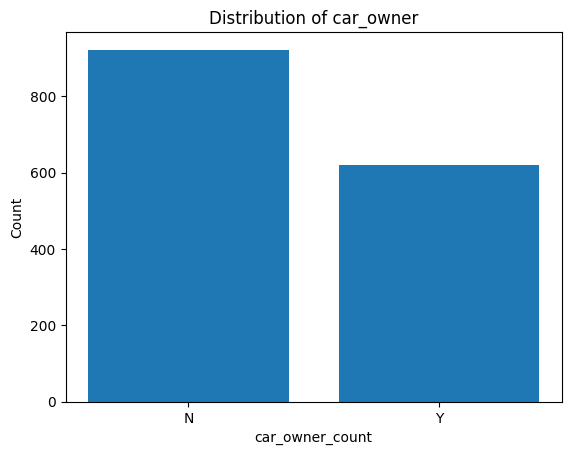

In [ ]:
#creat barpolt using Matplotlib
plt.bar(car_owner_count.index,car_owner_count.values)
plt.xlabel('car_owner_count')
plt.ylabel('Count')
plt.title('Distribution of car_owner')
plt.show()

In [ ]:
# count number of propert_owner
propert_owner_count=df1['Propert_Owner'].value_counts()

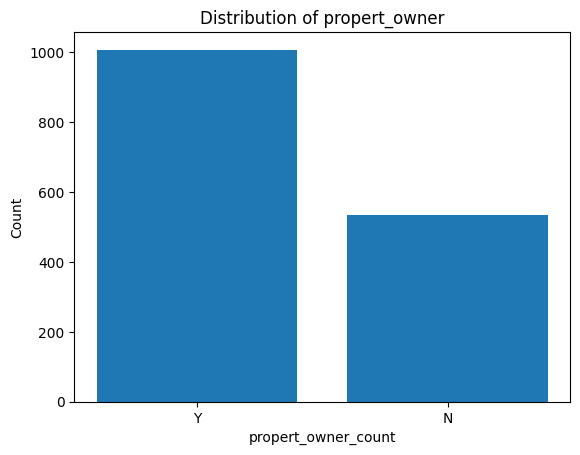

In [ ]:
#creat barpolt using Matplotlib
plt.bar(propert_owner_count.index,propert_owner_count.values)
plt.xlabel('propert_owner_count')
plt.ylabel('Count')
plt.title('Distribution of propert_owner')
plt.show()

In [ ]:
# count number of children
children_count=df1['Children'].value_counts()
children_count

0     1086
1      303
2      134
3       16
4        1
14       1
Name: Children, dtype: int64

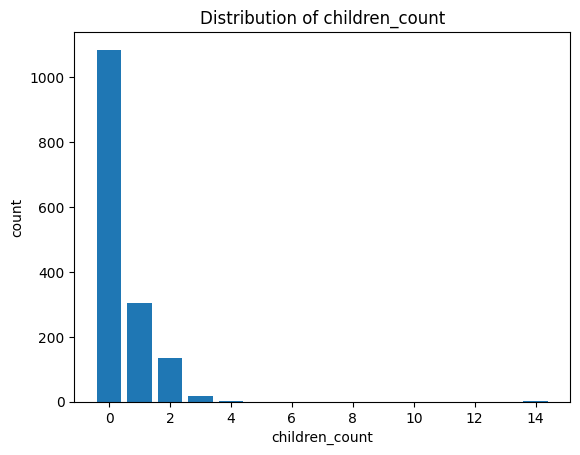

In [ ]:
#creat barpolt using Matplotlib
plt.bar(children_count.index,children_count.values)
plt.xlabel('children_count')
plt.ylabel('count')
plt.title('Distribution of children_count')
plt.show()

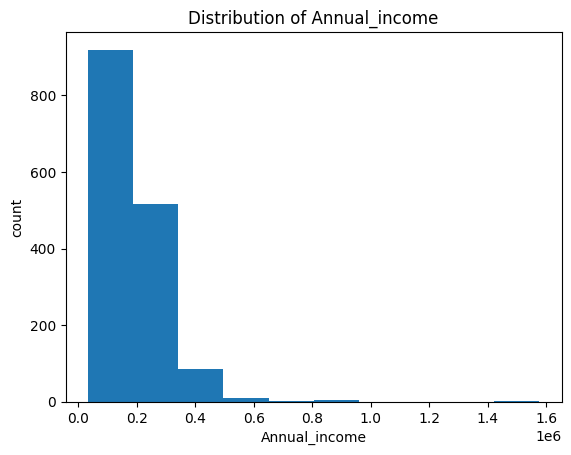

In [ ]:
# histograph on Annual_income
plt.hist(df1['Annual_income'], bins=10)
plt.xlabel('Annual_income')
plt.ylabel('count')
plt.title('Distribution of Annual_income')
plt.show()

In [ ]:
# count number of Type_Income
Type_Income_count=df1['Type_Income'].value_counts()

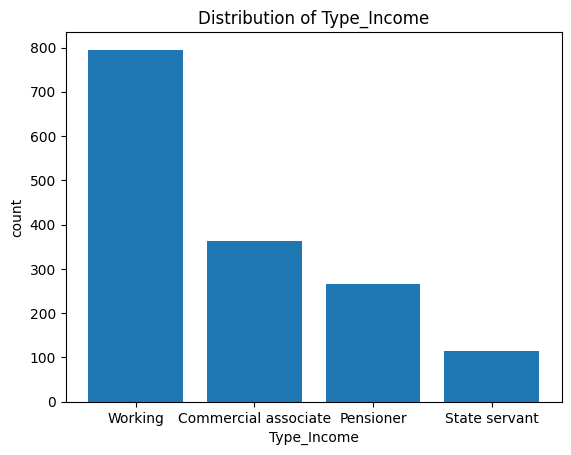

In [ ]:
#creat barpolt using Matplotlib
plt.bar(Type_Income_count.index,Type_Income_count.values)
plt.xlabel('Type_Income')
plt.ylabel('count')
plt.title('Distribution of Type_Income')
plt.show()

In [ ]:
# count number of Education
Education_count=df1['Education'].value_counts()
Education_count

Secondary / secondary special    1029
Higher education                  421
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: Education, dtype: int64

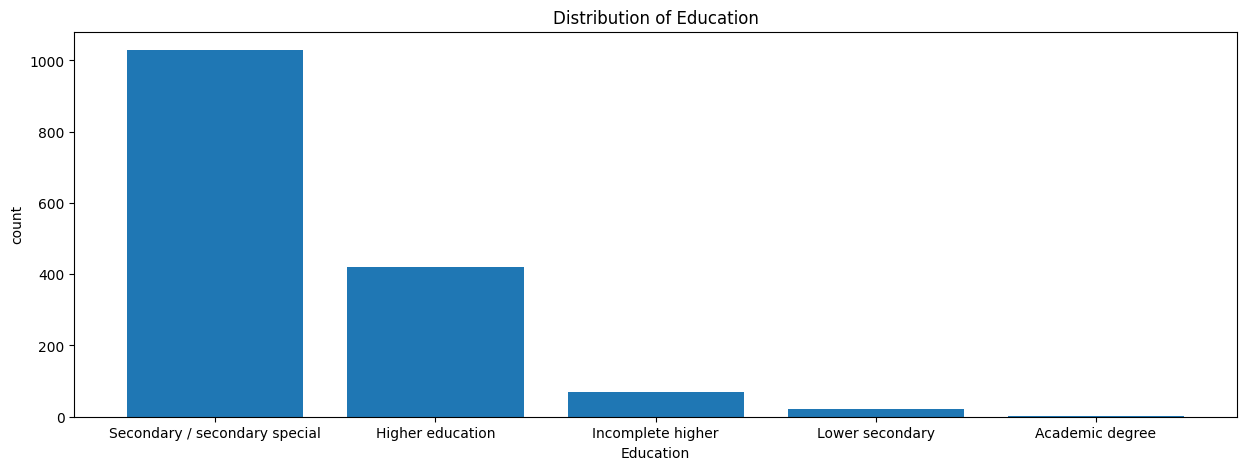

In [ ]:
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Education_count.index,Education_count.values)
plt.xlabel('Education')
plt.ylabel('count')
plt.title('Distribution of Education')
plt.show()


In [ ]:
# count number of Marital_status
Marital_status_count=df1['Marital_status'].value_counts()

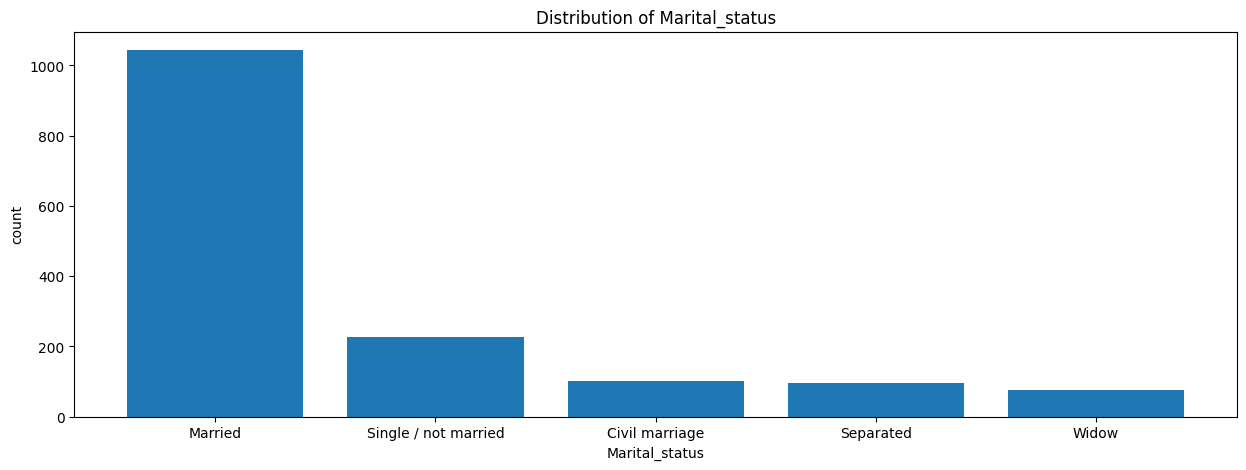

In [ ]:
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Marital_status_count.index,Marital_status_count.values)
plt.xlabel('Marital_status')
plt.ylabel('count')
plt.title('Distribution of Marital_status')
plt.show()


In [ ]:
# count number of Marital_status
Marital_status_count=df1['Marital_status'].value_counts()
Marital_status_count


Married                 1044
Single / not married     226
Civil marriage           101
Separated                 95
Widow                     75
Name: Marital_status, dtype: int64

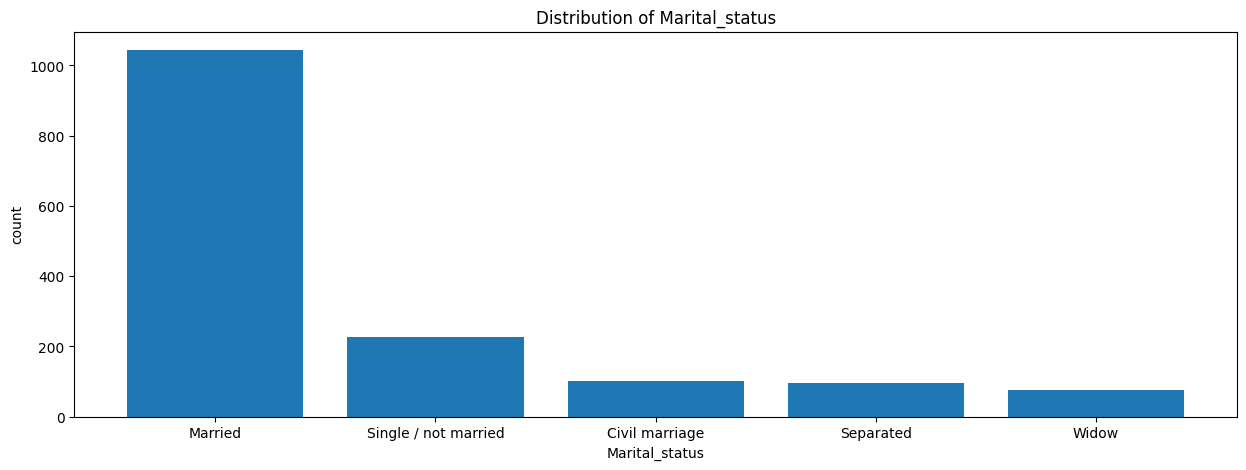

In [ ]:
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Marital_status_count.index,Marital_status_count.values)
plt.xlabel('Marital_status')
plt.ylabel('count')
plt.title('Distribution of Marital_status')
plt.show()


In [ ]:
# count number of Housing_type
Housing_type_count=df1['Housing_type'].value_counts()
Housing_type_count

House / apartment      1374
With parents             79
Municipal apartment      53
Rented apartment         21
Office apartment          9
Co-op apartment           5
Name: Housing_type, dtype: int64

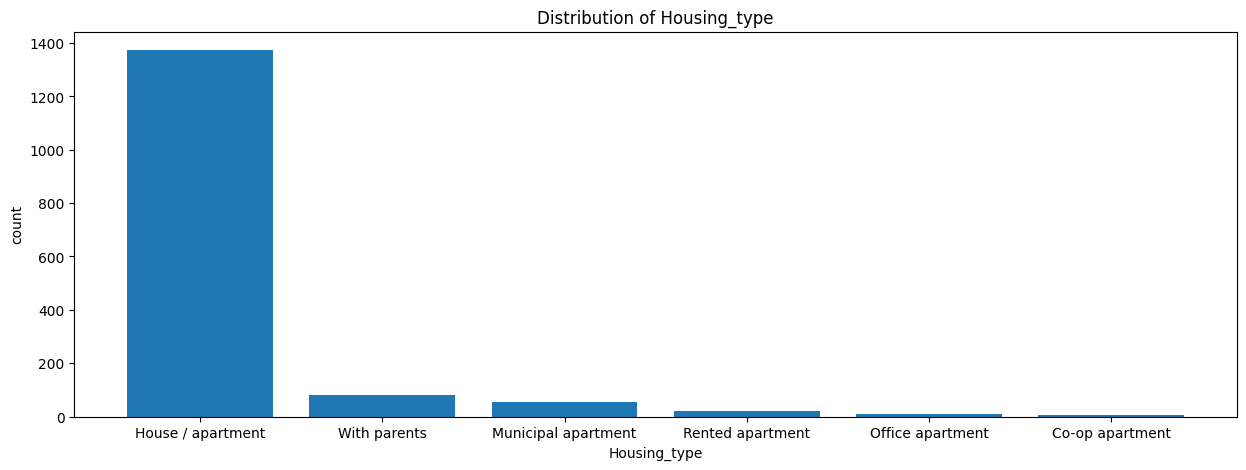

In [ ]:
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Housing_type_count.index,Housing_type_count.values)
plt.xlabel('Housing_type')
plt.ylabel('count')
plt.title('Distribution of Housing_type')
plt.show()

In [ ]:
# count number of Birthday_count
Birthday_count=df1['Age'].value_counts()

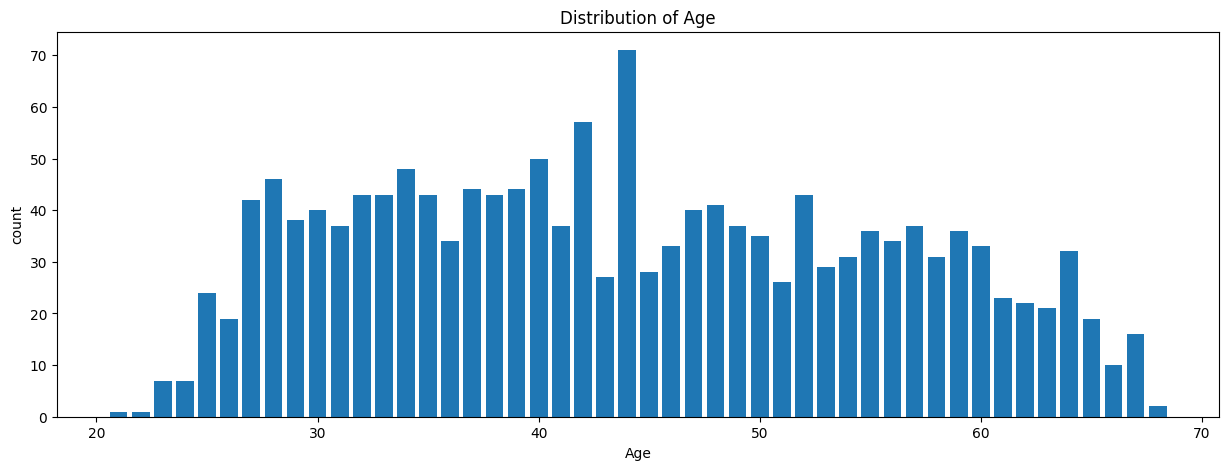

In [ ]:
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Birthday_count.index,Birthday_count.values)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age')
plt.show()


In [ ]:
# count number of Employed_days
Employed_days_count=df1['Employed_exp'].value_counts()
Employed_days_count


0.0     304
2.0     131
1.0     129
4.0     121
3.0     118
5.0     107
6.0      91
7.0      82
9.0      66
8.0      61
10.0     60
11.0     31
15.0     31
12.0     26
14.0     25
13.0     20
19.0     18
20.0     15
17.0     14
21.0     12
16.0     11
22.0     10
18.0     10
23.0      9
24.0      5
29.0      5
27.0      5
26.0      5
31.0      4
33.0      3
25.0      2
35.0      2
34.0      2
32.0      1
41.0      1
37.0      1
38.0      1
28.0      1
36.0      1
Name: Employed_exp, dtype: int64

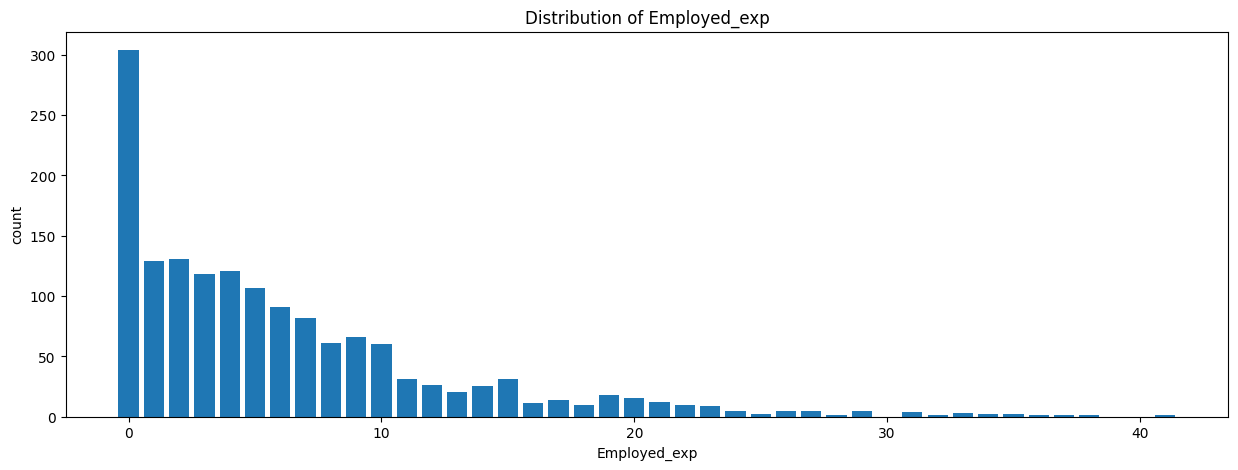

In [ ]:
#creat barpolt using Matplotlib
plt.figure(figsize=(15,5))
plt.bar(Employed_days_count.index,Employed_days_count.values)
plt.xlabel('Employed_exp')
plt.ylabel('count')
plt.title('Distribution of Employed_exp')
plt.show()

In [ ]:
# count number of Mobile_phone
Mobile_phone_count=df1['Mobile_phone'].value_counts()


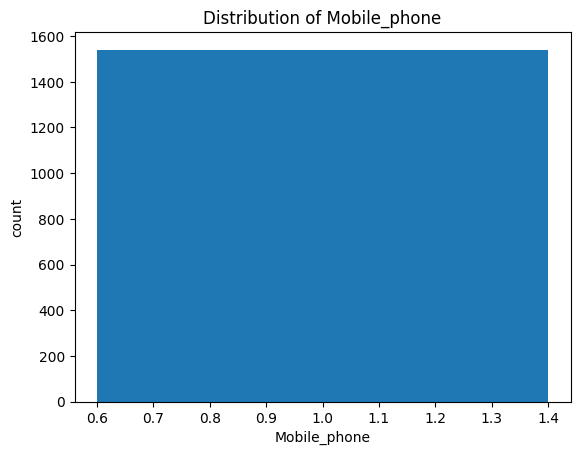

In [ ]:
#creat barpolt using Matplotlib
plt.bar(Mobile_phone_count.index,Mobile_phone_count.values)
plt.xlabel('Mobile_phone')
plt.ylabel('count')
plt.title('Distribution of Mobile_phone')
plt.show()

###In this every one have a mobile phone###

In [ ]:
# count number of Work_Phone
Work_Phone_count=df1['Work_Phone'].value_counts()
Work_Phone_count


0    1220
1     321
Name: Work_Phone, dtype: int64

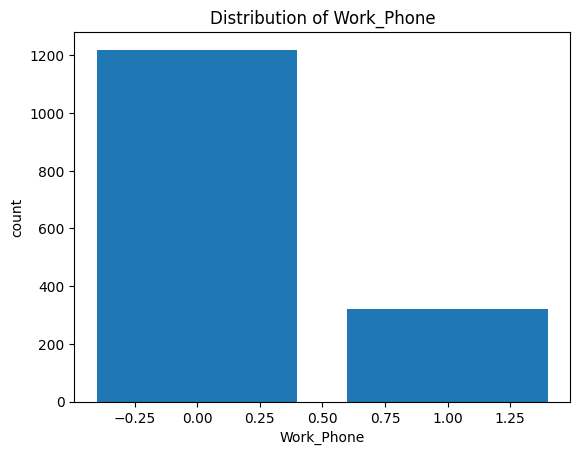

In [ ]:
#creat barpolt using Matplotlib
plt.bar(Work_Phone_count.index,Work_Phone_count.values)
plt.xlabel('Work_Phone')
plt.ylabel('count')
plt.title('Distribution of Work_Phone')
plt.show()

In [ ]:
# count number of Phone
Phone_count=df1['Phone'].value_counts()
Phone_count

0    1066
1     475
Name: Phone, dtype: int64

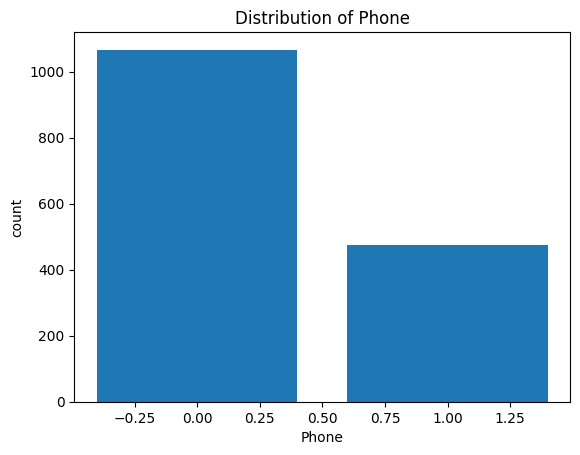

In [ ]:
#creat barpolt using Matplotlib
plt.bar(Phone_count.index,Phone_count.values)
plt.xlabel('Phone')
plt.ylabel('count')
plt.title('Distribution of Phone')
plt.show()

In [ ]:
# count number of Email_id
Email_id_count=df1['Email_id'].value_counts()
Email_id_count

0    1399
1     142
Name: Email_id, dtype: int64

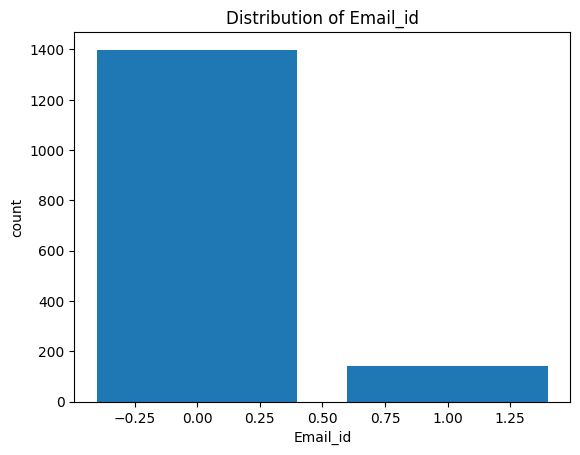

In [ ]:
#creat barpolt using Matplotlib
plt.bar(Email_id_count.index,Email_id_count.values)
plt.xlabel('Email_id')
plt.ylabel('count')
plt.title('Distribution of Email_id')
plt.show()

In [ ]:

# count number of Type_Occupation
Type_Occupation_count=df1['Type_Occupation'].value_counts()
Type_Occupation_count


other                    486
Laborers                 268
Core staff               172
Managers                 135
Sales staff              121
Drivers                   86
High skill tech staff     64
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64

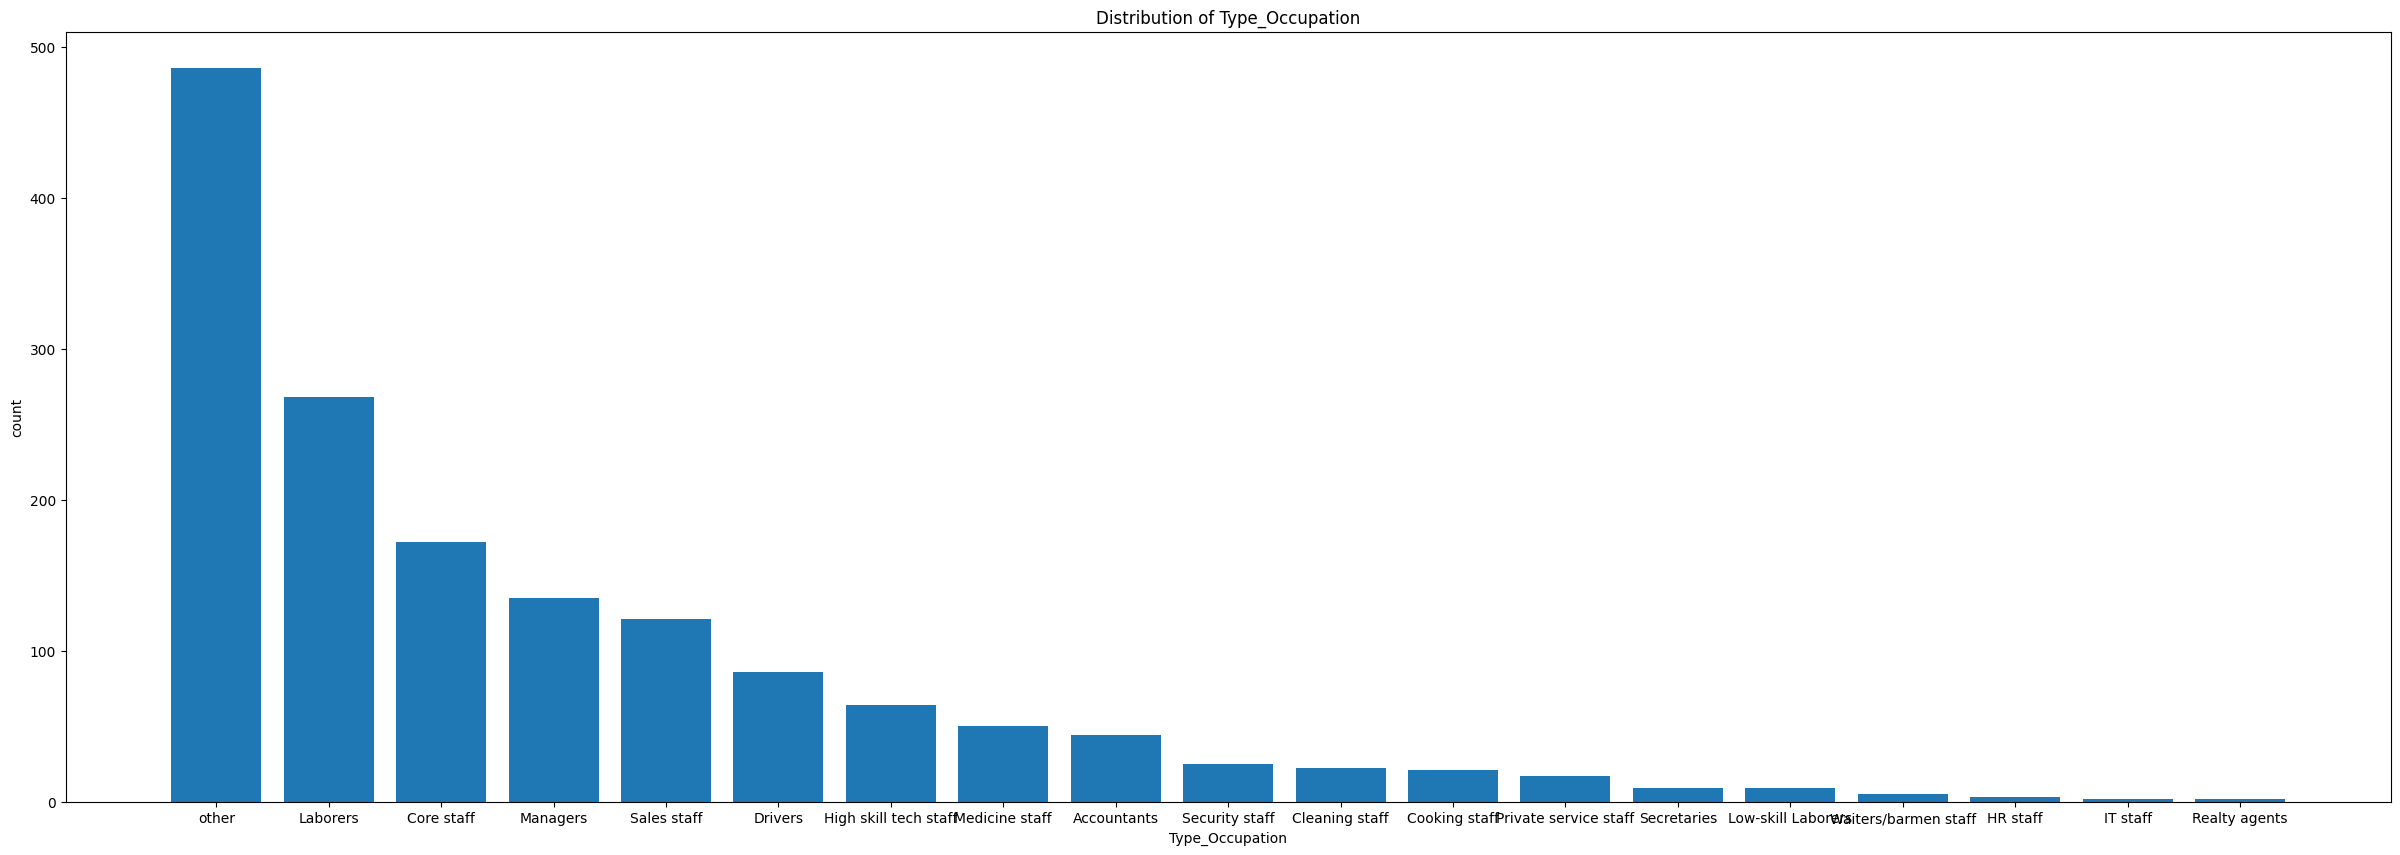

In [ ]:
#creat barpolt using Matplotlib
plt.figure(figsize=(30,10))
plt.bar(Type_Occupation_count.index,Type_Occupation_count.values)
plt.xlabel('Type_Occupation')
plt.ylabel('count')
plt.title('Distribution of Type_Occupation')
plt.show()

In [ ]:
# count number of Family_Members
Family_Members_count=df1['Family_Members'].value_counts()
Family_Members_count

2     799
1     332
3     266
4     127
5      15
6       1
15      1
Name: Family_Members, dtype: int64

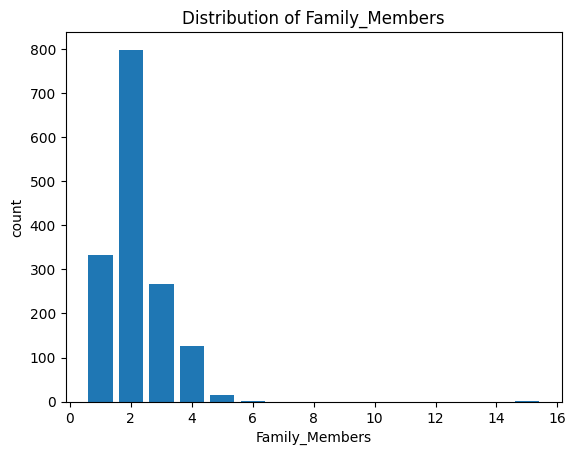

In [ ]:
#creat barpolt using Matplotlib
plt.bar(Family_Members_count.index,Family_Members_count.values)
plt.xlabel('Family_Members')
plt.ylabel('count')
plt.title('Distribution of Family_Members')
plt.show()

In [ ]:
# count number of label
label_count=df1['label'].value_counts()
label_count

0    1371
1     170
Name: label, dtype: int64

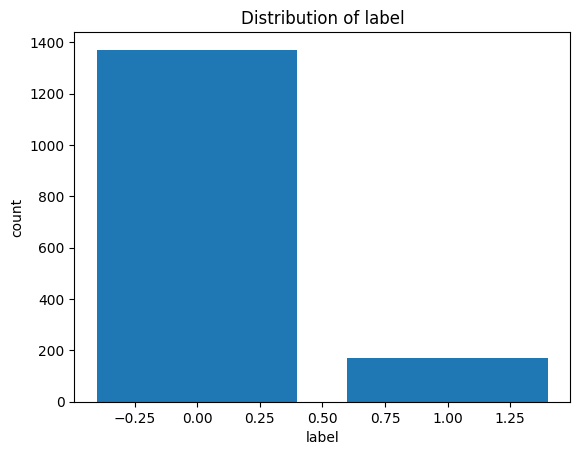

In [ ]:
#creat barpolt using Matplotlib
plt.bar(label_count.index,label_count.values)
plt.xlabel('label')
plt.ylabel('count')
plt.title('Distribution of label')
plt.show()

In [ ]:
df1.to_csv("final_project.csv")

In [ ]:
df1.head()

Ind_id Gender Car_Owner Propert_Owner  Children  Annual_income  \
0  5008827      M         Y             Y         0   180000.00000   
1  5009744      F         Y             N         0   315000.00000   
2  5009746      F         Y             N         0   315000.00000   
3  5009749      F         Y             N         0   191399.32623   
4  5009752      F         Y             N         0   315000.00000   

            Type_Income         Education Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

    Age  Employed_exp  Mobile_phone  Work_Phone  Phone  Email_id  \
0  51.0           0.0             1           0      0         0   
1  37.0           2.0             1           1      1         0   
2  44.0           2.0             1           1      1         0   
3  37.0           2.0             1           1      1         0   
4  37.0           2.0             1           1      1         0   

  Type_Occupation  Family_Members  label  
0           other               2      1  
1           other               2      1  
2           other               2      1  
3           other               2      1  
4           other               2      1

# **Relation between categorical variables.**

In [ ]:
df = df1.corr(method='spearman')
df

Ind_id  Children  Annual_income       Age  Employed_exp  \
Ind_id          1.000000  0.026155      -0.011117 -0.023564      0.025145   
Children        0.026155  1.000000       0.064120 -0.336771      0.156326   
Annual_income  -0.011117  0.064120       1.000000 -0.106760      0.165777   
Age            -0.023564 -0.336771      -0.106760  1.000000     -0.195991   
Employed_exp    0.025145  0.156326       0.165777 -0.195991      1.000000   
Mobile_phone         NaN       NaN            NaN       NaN           NaN   
Work_Phone      0.088004  0.040402      -0.069633 -0.164662      0.159235   
Phone           0.007702  0.014571      -0.020205  0.036688      0.008315   
Email_id       -0.044812  0.055700       0.116949 -0.161943     -0.004001   
Family_Members  0.007507  0.814514       0.039158 -0.276376      0.182474   
label           0.016660 -0.014037      -0.000154  0.048210     -0.100412   

                Mobile_phone  Work_Phone     Phone  Email_id  Family_Members  \
Ind_id                   NaN    0.088004  0.007702 -0.044812        0.007507   
Children                 NaN    0.040402  0.014571  0.055700        0.814514   
Annual_income            NaN   -0.069633 -0.020205  0.116949        0.039158   
Age                      NaN   -0.164662  0.036688 -0.161943       -0.276376   
Employed_exp             NaN    0.159235  0.008315 -0.004001        0.182474   
Mobile_phone             NaN         NaN       NaN       NaN             NaN   
Work_Phone               NaN    1.000000  0.353164 -0.008726        0.086653   
Phone                    NaN    0.353164  1.000000  0.015692        0.019702   
Email_id                 NaN   -0.008726  0.015692  1.000000        0.054068   
Family_Members           NaN    0.086653  0.019702  0.054068        1.000000   
label                    NaN   -0.007203 -0.001799  0.009560       -0.025891   

                   label  
Ind_id          0.016660  
Children       -0.014037  
Annual_income  -0.000154  
Age             0.048210  
Employed_exp   -0.100412  
Mobile_phone         NaN  
Work_Phone     -0.007203  
Phone          -0.001799  
Email_id        0.009560  
Family_Members -0.025891  
label           1.000000

<Axes: >

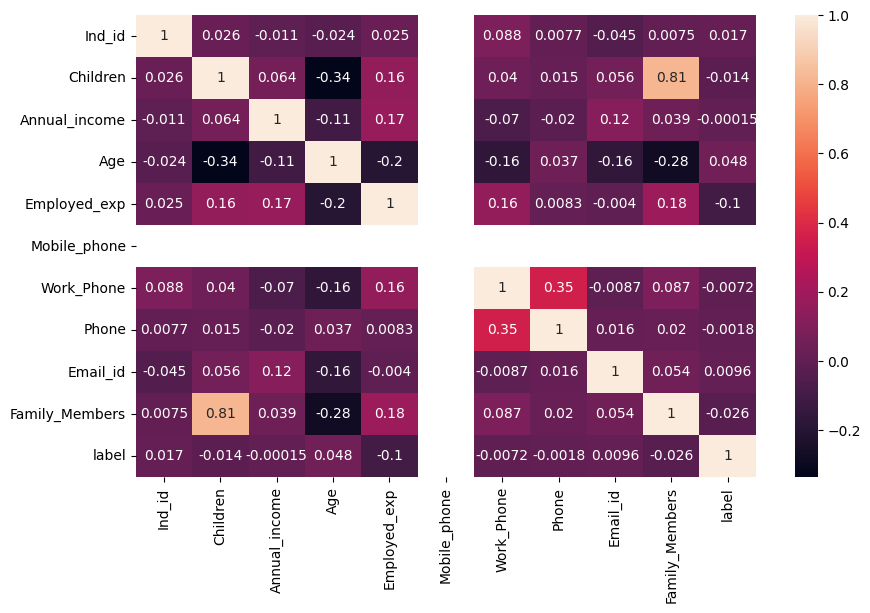

In [ ]:
#Visualization of correlation using Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df,annot=True)

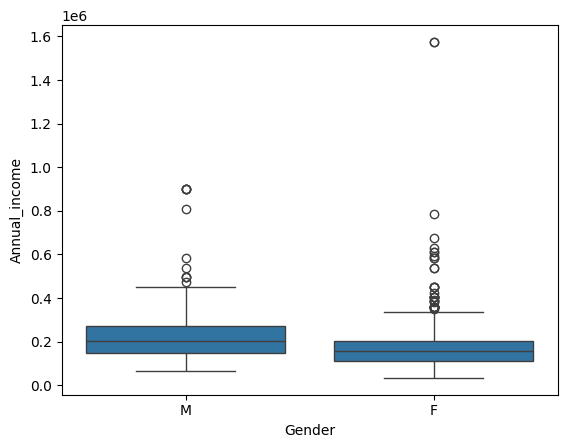

In [ ]:
sns.boxplot(x ='Gender',y ="Annual_income",data=df1)
plt.show()

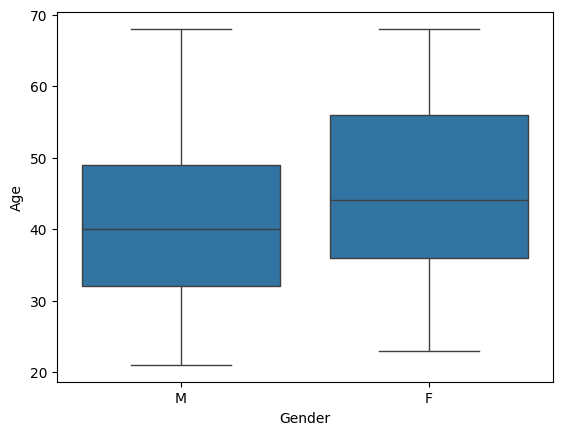

In [ ]:
sns.boxplot(x ='Gender',y ="Age",data=df1)
plt.show()

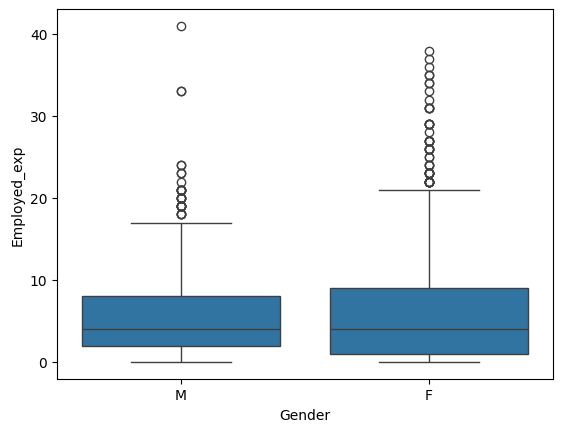

In [ ]:
sns.boxplot(x ='Gender',y ="Employed_exp",data=df1)
plt.show()

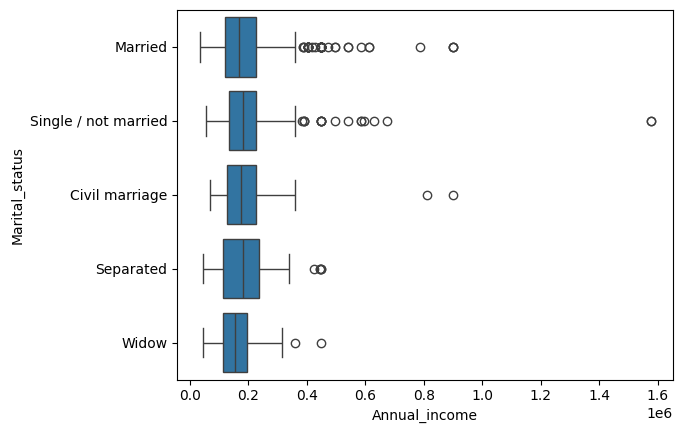

In [ ]:
sns.boxplot(x ='Annual_income',y ="Marital_status",data=df1)
plt.show()

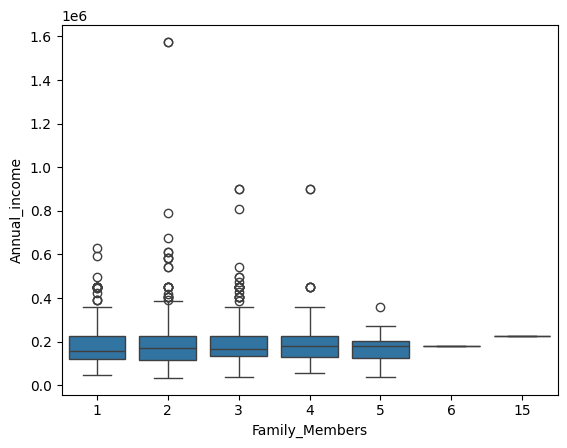

In [ ]:
sns.boxplot(x ='Family_Members',y ="Annual_income",data=df1)
plt.show()


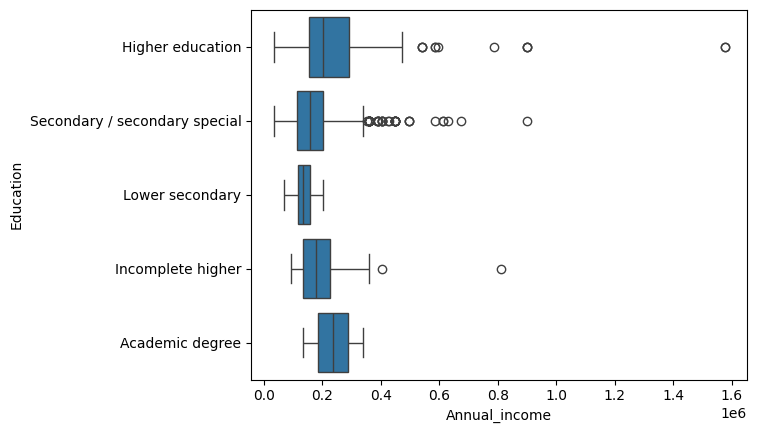

In [ ]:
sns.boxplot(x ='Annual_income',y ="Education",data=df1)
plt.show()


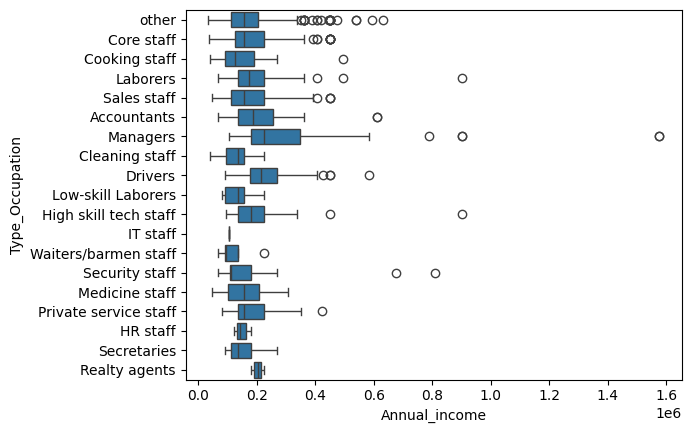

In [ ]:
sns.boxplot(x ='Annual_income',y ="Type_Occupation",data=df1)
plt.show()


In [ ]:
df.head()

Ind_id  Children  Annual_income       Age  Employed_exp  \
Ind_id         1.000000  0.026155      -0.011117 -0.023564      0.025145   
Children       0.026155  1.000000       0.064120 -0.336771      0.156326   
Annual_income -0.011117  0.064120       1.000000 -0.106760      0.165777   
Age           -0.023564 -0.336771      -0.106760  1.000000     -0.195991   
Employed_exp   0.025145  0.156326       0.165777 -0.195991      1.000000   

               Mobile_phone  Work_Phone     Phone  Email_id  Family_Members  \
Ind_id                  NaN    0.088004  0.007702 -0.044812        0.007507   
Children                NaN    0.040402  0.014571  0.055700        0.814514   
Annual_income           NaN   -0.069633 -0.020205  0.116949        0.039158   
Age                     NaN   -0.164662  0.036688 -0.161943       -0.276376   
Employed_exp            NaN    0.159235  0.008315 -0.004001        0.182474   

                  label  
Ind_id         0.016660  
Children      -0.014037  
Annual_income -0.000154  
Age            0.048210  
Employed_exp  -0.100412

In [ ]:
# removing unused columns
df1 = df1.drop(['Ind_id', 'Mobile_phone','Work_Phone','Phone','Email_id'], axis=1)

# **Feature Engineering**


In [ ]:
# converting non numeric to numeric for train and test data
#Importing Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df1:
  if df1[col].dtype=='object':
    df1[col]=le.fit_transform(df1[col])


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1541 non-null   int64  
 1   Car_Owner        1541 non-null   int64  
 2   Propert_Owner    1541 non-null   int64  
 3   Children         1541 non-null   int64  
 4   Annual_income    1541 non-null   float64
 5   Type_Income      1541 non-null   int64  
 6   Education        1541 non-null   int64  
 7   Marital_status   1541 non-null   int64  
 8   Housing_type     1541 non-null   int64  
 9   Age              1541 non-null   float64
 10  Employed_exp     1541 non-null   float64
 11  Type_Occupation  1541 non-null   int64  
 12  Family_Members   1541 non-null   int64  
 13  label            1541 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 180.6 KB


In [ ]:
df1.shape

(1541, 14)

# **Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
# spliting the data
x = df1.iloc[:,0:-1]
y = df1.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=40)


In [ ]:
# count the number rows and columns for x_test
x_test.shape


(463, 13)

In [ ]:
# count the number rows and columns for x_train
x_train.shape


(1078, 13)

In [ ]:
# count the number rows for y_test
y_test.shape


(463,)

In [ ]:
# count the number rows for y_train
y_train.shape

(1078,)

# **Scaling**

In [ ]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
rescale_x_train = scaler.fit_transform(x_train)
rescale_x_test = scaler.fit_transform(x_test)
print(rescale_x_train.shape)
print(rescale_x_test.shape)


(1078, 13)
(463, 13)


# *Applying ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable*

#  **LogisticRegression**

In [ ]:
# importing the LogisticRegression
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)
logreg.fit(rescale_x_train, y_train)


LogisticRegression(random_state=0)

In [ ]:
#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = logreg.predict(rescale_x_test)
print("logistic regression training set:",logreg.score(x_train, y_train))
print("logistic regression testing set:",logreg.score(x_test, y_test))
print("Accuracy of logistic regression classifier: ", accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))


logistic regression training set: 0.10946196660482375
logistic regression testing set: 0.11231101511879049
Accuracy of logistic regression classifier:  0.8876889848812095
[[411   0]
 [ 52   0]]


#**cross validation**

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= LogisticRegression()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.89967638 0.86407767 0.83495146 0.89644013 0.87702265 0.89644013
 0.88673139 0.91262136 0.89320388 0.89967638]
0.8860841423948219


#**Decision Tree**

In [ ]:
# decision tree classification  without rescaled
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(x_train,y_train)
y_pred = classification.predict(x_test)
print("decision tree training set:",classification.score(x_train, y_train))
print("decision tree testing set:",classification.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))


decision tree training set: 0.9944341372912802
decision tree testing set: 0.8552915766738661
Accuracy: 0.8552915766738661
[[375  36]
 [ 31  21]]


# cross validation


In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model= DecisionTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))


[0.87055016 0.86084142 0.87702265 0.85760518 0.82847896 0.82847896
 0.89644013 0.85113269 0.84142395 0.8381877 ]
0.8550161812297734


#**xgboost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
xg=XGBClassifier()
xg=xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print("xg training set:",xg.score(x_train, y_train))
print("xg testing set:",xg.score(x_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))


xg training set: 0.9935064935064936
xg testing set: 0.9092872570194385
Accuracy: 0.9092872570194385
[[401  10]
 [ 32  20]]


#**cross validation**

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=XGBClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.20)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))

[0.93203883 0.88673139 0.90291262 0.92880259 0.93851133 0.91262136
 0.92556634 0.91262136 0.93527508 0.91585761]
0.919093851132686


#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print("rf training set:",rf.score(x_train, y_train))
print("rf testing set:",rf.score(x_test, y_test))
print("Random Forest classifier has accuracy of: ", rf.score(x_test, y_test))
# Evaluate the confusion_matrix
print(confusion_matrix(y_test, y_pred))

rf training set: 1.0
rf testing set: 0.6666666666666666
Random Forest classifier has accuracy of:  0.6666666666666666
[[2 0]
 [1 0]]


#**cross validation**

In [ ]:
# cross validation
from sklearn.model_selection import ShuffleSplit
model=RandomForestClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,x,y,cv=ssplit)
print(results)
print(np.mean(results))


[0.93304536 0.92008639 0.92440605 0.90280778 0.92008639 0.93520518
 0.92224622 0.91360691 0.94168467 0.92224622]
0.9235421166306697


#***CONCLUSION***

#**Hence we got accuracy on different classification**

* logisitic regression got accuracy 88%
* DecisionTree got accuracy 85%
* xg boosting got accuracy 90%
* Random Forest got accuracy 92%

**we have done all the elementry EDA steps needed and plotted various graphs to determine the correlation among the independent variables and also between the independent and dependent variable.**

**After feature selection we used four machine learning models and achieved quite good accuracy 92% in Random Forest for predicting the credit card approval.**




